# How Pix2Pix works ?

## Image-to-Image translation

Image-to-Image translation is defined as the task of translating from one possible representation or style of the scene to another, given the amount of training data from two set of scenes. There are currently two types of Image-to-Image translation model implemented into the `arcgis.learn` module, Pix2Pix and CycleGAN. 

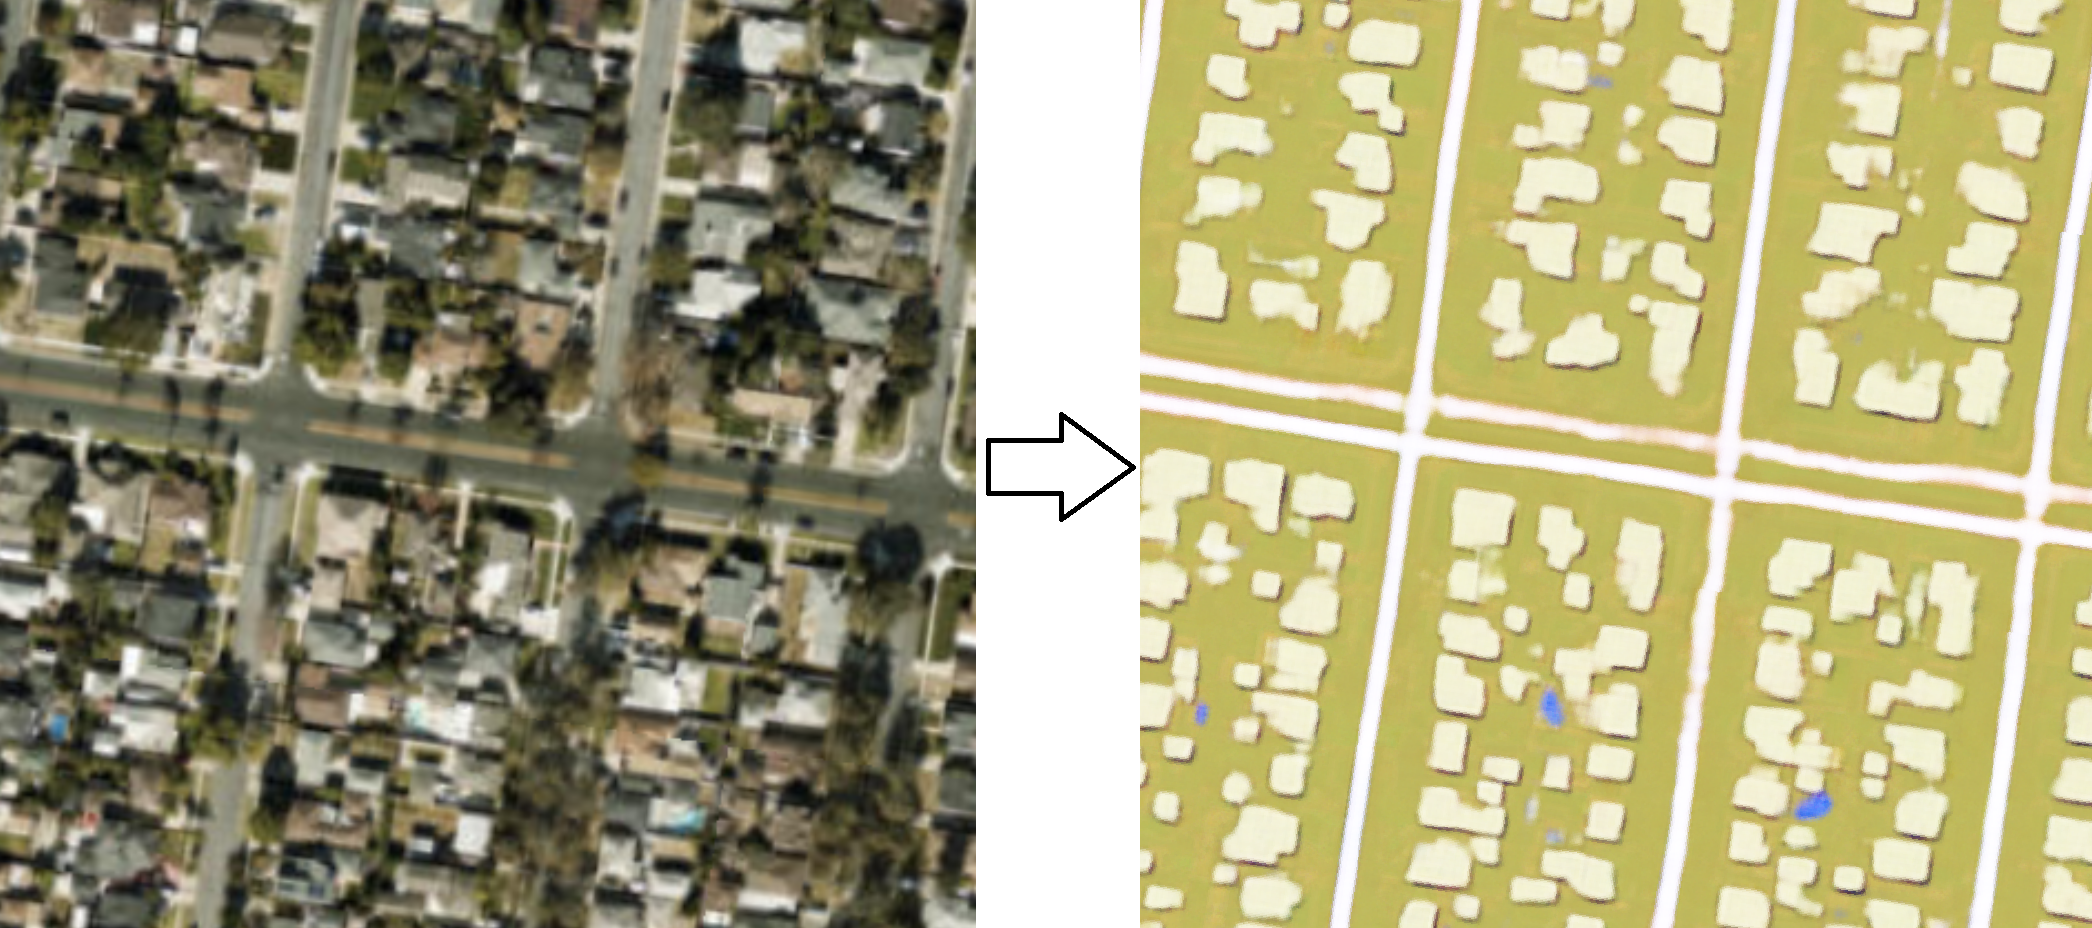

<center> Figure 1. Satellite imagery to map translation using Pix2Pix </center>

In this guide, we will focus on Pix2Pix [[1](https://arxiv.org/abs/1611.07004)], which is one of the famous and sucessful deep learning models used for paired image translation. In geospatial sciences, this approach could help in wide range of applications traditionally not possible, where we may want to go from one domain of images to another i.e. image to map, RGB to multi-spectral imagery, SAR to imagery, DSM to imagery etc.

To follow the guide below, we assume that you have some basic understanding of the convolutional neural networks (CNN) concept. You can refresh your CNN knowledge by going through this short paper [“A guide to convolution arithmetic for deep learning”](https://arxiv.org/pdf/1603.07285.pdf) and course on Convolutional Neural Networks for Visual Recognition [[2](http://cs231n.stanford.edu/)]. Also, we recommend to read this paper about [Generative Adversarial Networks: An Overview](https://arxiv.org/abs/1710.07035) and go through fast.ai course on [GANs](https://course18.fast.ai/lessons/lesson12.html) before reading this one. Pix2Pix are a type of GAN architecture called conditonal GAN. Hence, its important for us to know basics of GANs.

## Basics of generative adversarial networks (GAN)

GANs are type of framework that estimate generative models through a adversarial process, in which two models are trained simultenously called generator (G) and discriminator (D) model. The generator model learns to generate probable data while, the discriminator model learns to distinguish the fake data generated by G from the real data [[3](https://papers.nips.cc/paper/2014/file/5ca3e9b122f61f8f06494c97b1afccf3-Paper.pdf)]. Hence, the objective function for training the GAN and can be expressed as a two-player min–max game, where the goal of the generator G is to minimize the objective, and the discriminator D tries to maximize it. 

This approach of training leads the generator G to estimate or generate sample data that can fool the discriminator D as training progresses and finally the discriminator D gets terrible in differentiating between real and fake data and its accuracy decreases. The basic architecture of a GAN is shown in figure 2 [[4](https://stephan-osterburg.gitbook.io/coding/coding/ml-dl/tensorfow/chapter-4-conditional-generative-adversarial-network/acgan-architectural-design)].

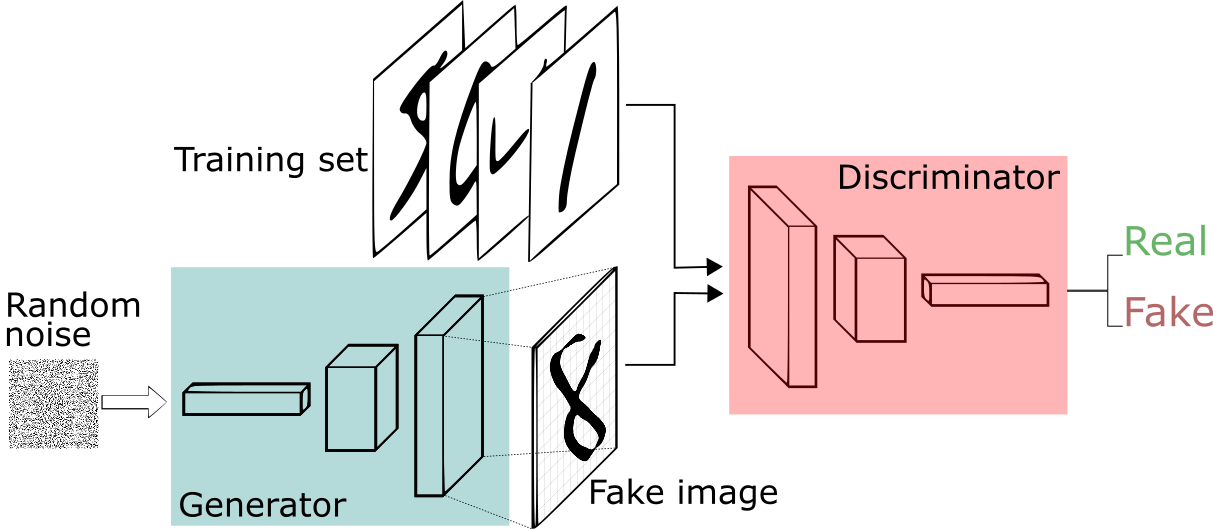

<center> Figure 2. basic GAN architecture </center> 

## Pix2Pix

Pix2Pix is based on condtional GAN architecture. conditional GANs or cGAN are a type of GAN architecture. cGANs are trained on paired set of images or scenes from two domains to be used for translation. As GANs are trained to generate fake samples from entire set of training dataset, it often lead to poor results. Hence, we condition the generator and discriminator on an input image or some assisting information leading to targeted generation of images from target domain. This makes cGANs suitable for image-to-image translation tasks, where we condition on an input image and generate a corresponding output image.

The architecture of pix2pix consists of a Generator G and a Discriminator D. The Generator G is a encoder-decoder net or U-Net with skip connection while, Discriminator is a patch-GAN architecture, which penalizes at scale of patches. 

## Model architecture

### U-Net generator

U-net was originally invented and first used for biomedical image segmentation. Its architecture can be broadly thought of as an encoder network followed by a decoder network.

- The encoder is the first half in the architecture diagram (Figure 3). It usually is a classification network like VGG/ResNet where you apply convolution blocks followed by a maxpool downsampling to encode the input image into feature representations at multiple different levels.


- The decoder is the second half of the architecture. The goal is to project the discriminative features (lower resolution) learnt by the encoder onto the pixel space (higher resolution) to get a dense values. The decoder consists of upsampling and concatenation followed by regular convolution operations.

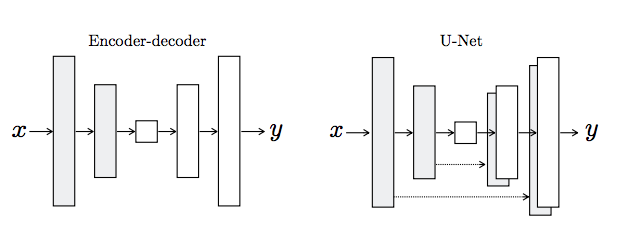

<center> Figure 3. The Skip Connections in the U-Net differentiate it from a standard Encoder-decoder architecture </center> 

The generator loss is a sigmoid cross-entropy loss between generated images and array of ones (gan adversarial loss) and L1 loss, also called MAE(mean absolute error) between generated image and target image. Hence, total generated loss becomes gan adversarial loss + LAMBDA * l1 loss, where LAMBDA = 100 [[1](https://arxiv.org/abs/1611.07004)].

In the network, the input is passed through a series of layers that progressively downsample (encoder), until a bottleneck layer, at which point the process is reversed (decoder). Such a network requires that all information flow pass through all the layers, including the bottleneck. To catch every low level information shared between input and output, we add skip connections between each layer i and layer n − i, where n is the total number of layers. Each skip connection simply concatenates all channels at layer i with those at layer n − i (Figure. 3).

### Patch-GAN discriminator

The patch-GAN discriminator is a unique component added to the architecture of pix2pix. It works by classifying a patch of (n*n) in a image into real and fake rather than classifying whole image into real and fake. This forces more constraints and encourages sharp high frequency details. This works faster than classifing whole image and has less parameters. The discriminator accepts two image pairs as input, input image, target image and input image, generated image. we concatenate this two input pairs.

The discriminator loss consists of two losses, one is a sigmoid cross-entropy loss between real image and array of ones and another is between generated image and array of zeros. The total discriminator loss is sum of these two losses. For detailed description of architectures and hyper-parameters refer to this [paper](https://arxiv.org/abs/1611.07004)

Pix2Pix model architecture shown in figure 4 is translating from simple styled map to target styled map domain. [[4](https://arxiv.org/pdf/1905.02200.pdf)]

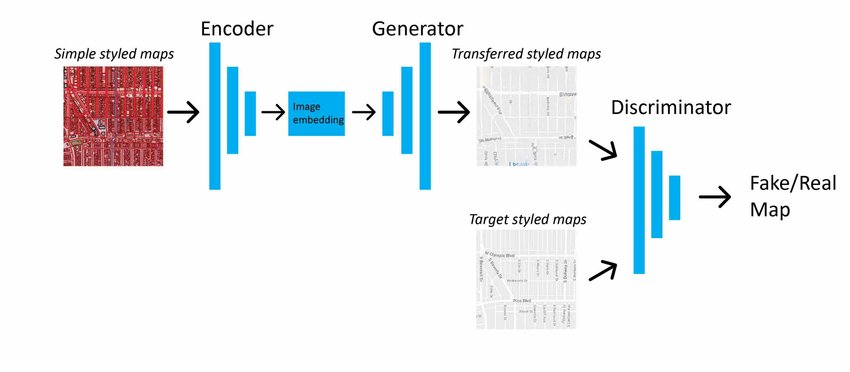

<center> Figure 4. Pix2Pix model architecture </center> 

## Implementation in  `arcgis.learn`

Initially, we have to export the image chips in `Export tiles` format using `Export Training data for deep learning` tool avialable in ArcGIS Pro by providing two domains of imagery in `Input Raster` and `Additional Input Raster`, then the path is provided to `prepare_data` function in `arcgis.learn` to create a databunch, than we have to create a databunch with `prepare_data` function in `arcgis.learn`

`data = arcgis.learn.prepare_data(path=r"path/to/exported/data")`

By default, we create U-Net generator and patch-GAN discriminator, while initializing the `Pix2Pix`object. We can simply do that as shown below:

`model = arcgis.learn.Pix2Pix(data=data)`

Here data is a fastai databunch, object returned from `prepare_data` function. As `arcgis.learn` is built upon fast.ai, more explanation can be found at fast.ai's docs [[6](https://fastai1.fast.ai/index.html)]

Than we can continue with basic `arcgis.learn` workflow.

For more information about the API & model applications, please go to the [API reference](https://developers.arcgis.com/python/api-reference/arcgis.learn.html) and [sample notebook](https://developers.arcgis.com/python/sample-notebooks/generating-rgb-imagery-from-digital-surface-model-using-pix2pix/). 

## Summary 

In this guide, we learned about the various details of the image-to-image translation model, `Pix2Pix` and how we can initialize the model in `arcgis.learn`

## References

- [1] Isola, Phillip, Jun-Yan Zhu, Tinghui Zhou, and Alexei A. Efros. "Image-to-image translation with conditional adversarial networks." In Proceedings of the IEEE conference on computer vision and pattern recognition, pp. 1125-1134. 2017.
- [2] CS231n: Convolutional Neural Networks for Visual Recognition. http://cs231n.stanford.edu/
- [3] Goodfellow, Ian, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley, Sherjil Ozair, Aaron Courville, and Yoshua Bengio. "Generative adversarial nets." In Advances in neural information processing systems, pp. 2672-2680. 2014.
- [4] https://stephan-osterburg.gitbook.io/coding/coding/ml-dl/tensorfow/chapter-4-conditional-generative-adversarial-network/acgan-architectural-design. Accessed 27 November 2020.
- [5] Kang, Yuhao, Song Gao, and Robert E. Roth. "Transferring multiscale map styles using generative adversarial networks." International Journal of Cartography 5, no. 2-3 (2019): 115-141.
- [6] Fast.ai docs. https://fastai1.fast.ai/index.html. Accessed 27 November 2020.
- [7] Fast.ai's course on GANs. https://course18.fast.ai/lessons/lesson12.html. Accessed 27 November 2020.